Note: thingy.

Current Updates:
adding libraries I think we'll need


In [153]:
# Libraries for data wrangling and transformation
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
# Libraries for data analysis
import matplotlib.pyplot as plt


# Miscellaneous
from datetime import datetime
from matplotlib import cm
import matplotlib.colors as mcolors

In [21]:
data = pd.read_csv("twitchdata-update.csv")

In [22]:
data

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


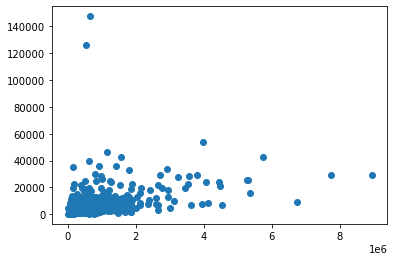

In [19]:
plt.scatter(data["Followers"], data["Average viewers"])

Text(0.5, 1.0, 'Watch time vs. Peak Viewers')

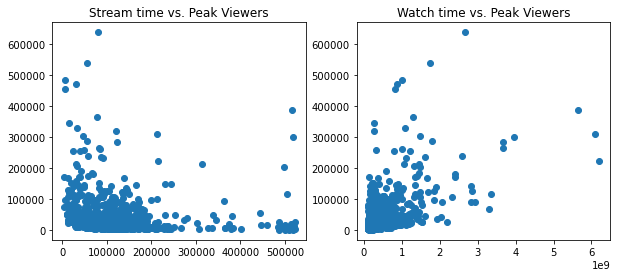

In [46]:
plt.figure(figsize=(10,4))
c1 = plt.subplot(1,2,1)
c1 = plt.scatter(data["Stream time(minutes)"], data["Peak viewers"])
plt.title("Stream time vs. Peak Viewers")
c2 = plt.subplot(1,2,2)
c2 = plt.scatter(data["Watch time(Minutes)"], data["Peak viewers"])
plt.title("Watch time vs. Peak Viewers")

In [300]:
lang = data["Language"].unique()
langs = data.groupby(["Language"])["Channel"].count().sort_values(axis=0,ascending=False)
langs

Language
English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Other           1
Greek           1
Slovak          1
Finnish         1
Swedish         1
Name: Channel, dtype: int64

array([485, 77, 74, 68, 66, 61, 49, 30, 22, 17, 12, 11, 10, 6, 5, 2, 1, 1,
       1, 1, 1,
       array([48.5,  7.7,  7.4,  6.8,  6.6,  6.1,  4.9,  3. ,  2.2,  1.7,  1.2,
               1.1,  1. ,  0.6,  0.5,  0.2,  0.1,  0.1,  0.1,  0.1,  0.1])     ],
      dtype=object)

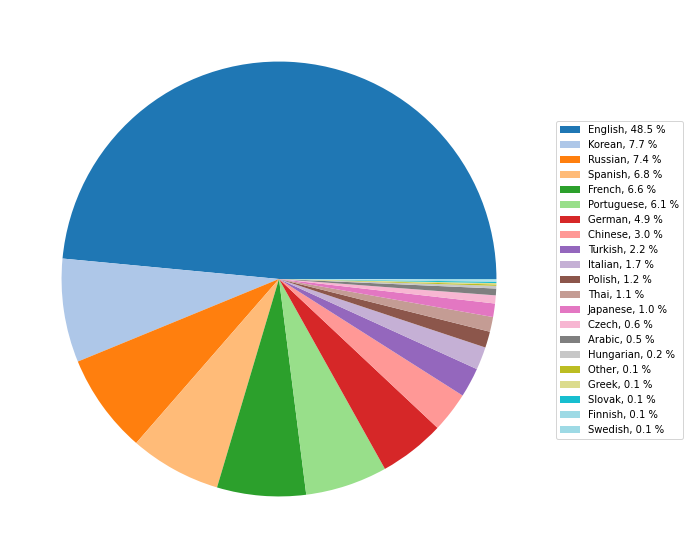

In [308]:
cmap = cm.tab20(np.arange(lang.size))

fig1, ax1 = plt.subplots(figsize=(10,10))
pichart = ax1.pie(langs,colors=cmap)
percents = langs.values * 100 / langs.values.sum()
legend = ['%s, %1.1f %%' % (l, s) for l, s in zip(langs.index,percents)]
plt.legend(labels = legend
           ,bbox_to_anchor=(1,0.8))

Text(0.5, 1.0, 'Followers by Language')

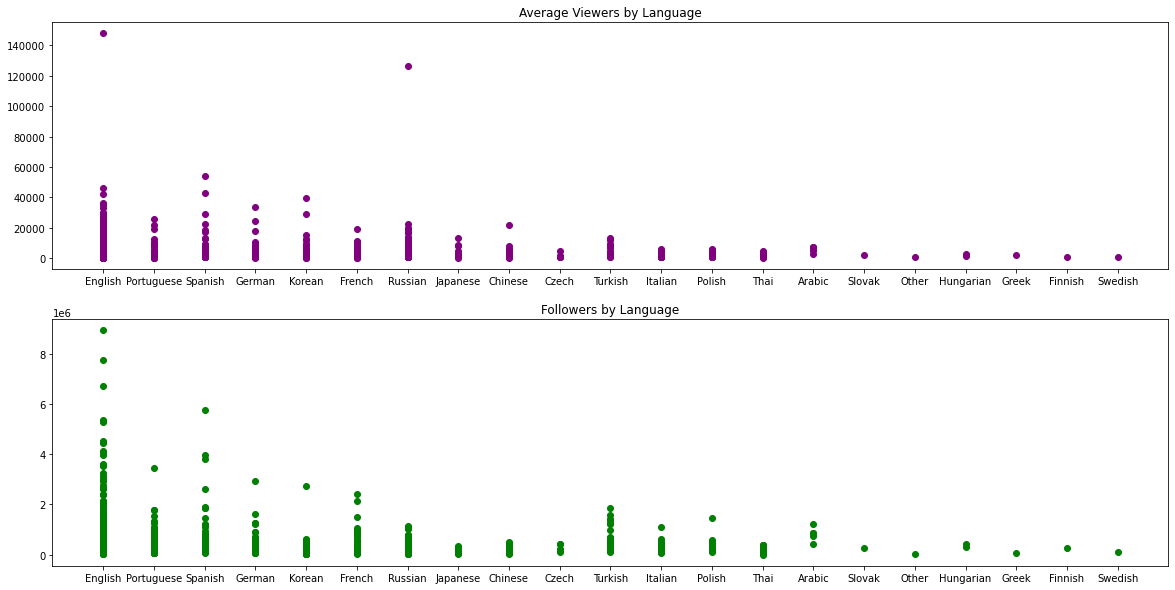

In [288]:
plt.figure(figsize=(20,10))   
l1 = plt.subplot(2,1,1)
l1 = plt.scatter(data["Language"], data["Average viewers"], color = "purple")
plt.title("Average Viewers by Language")
l2 = plt.subplot(2,1,2)
l2 = plt.scatter(data["Language"],data["Followers"],  color = "green")
plt.title("Followers by Language")

AttributeError: module 'matplotlib.pyplot' has no attribute 'Title'

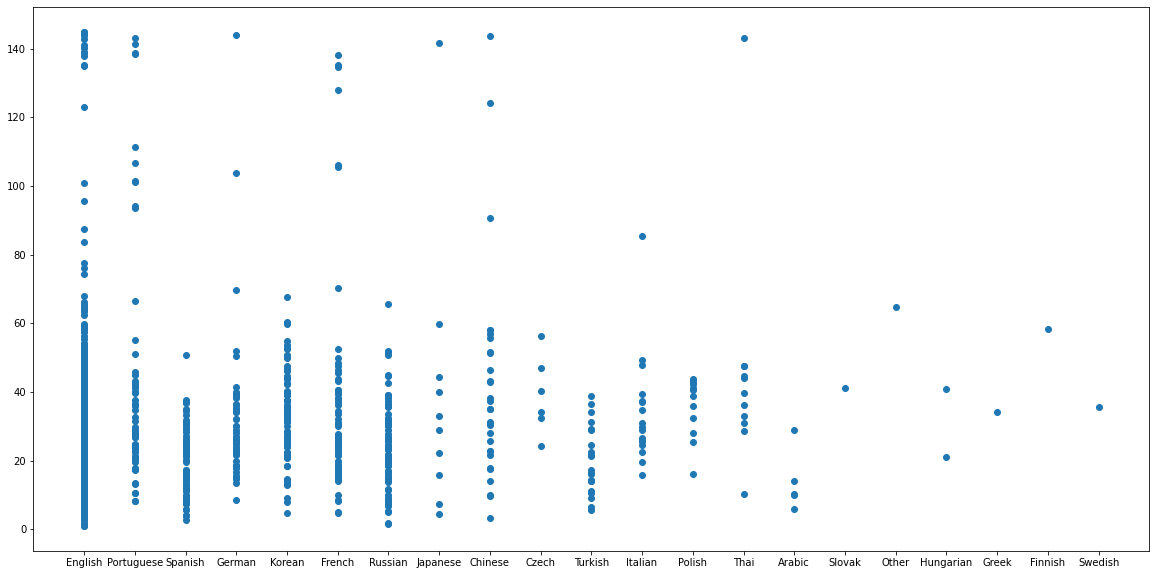

In [53]:
def convertmh(row):
    n = float(row["Stream time(minutes)"])/60/60
    return n

data["Stream time(days)"] = data.apply(lambda row: convertmh(row),axis = 1)
data = data
plt.figure(figsize=(20,10))
plt.scatter(data["Language"],data["Stream time(days)"])
plt.Title("Stream time by Language (days)")

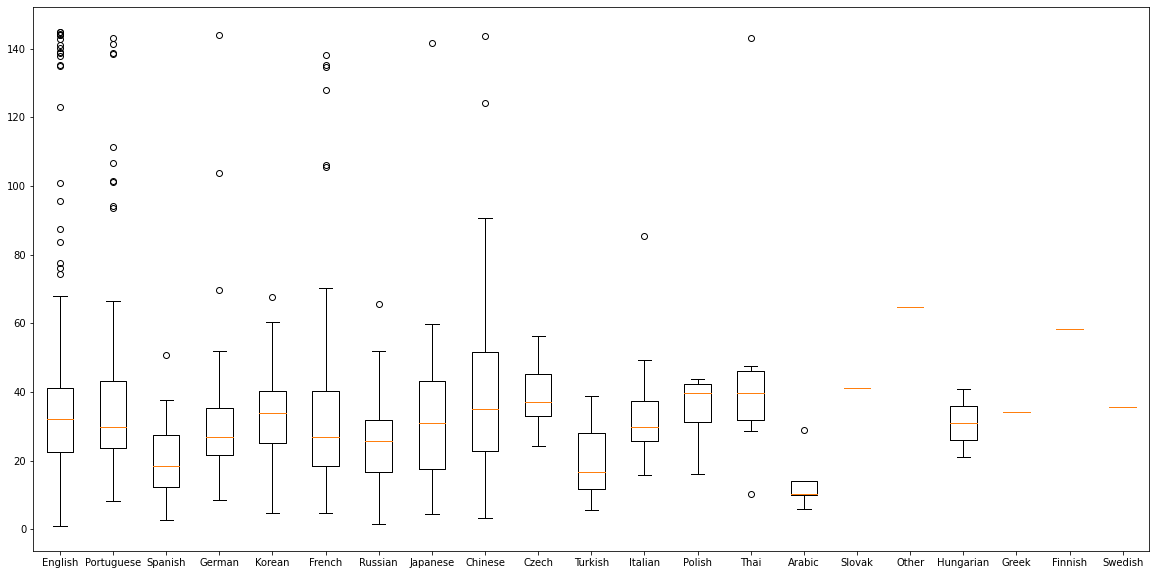

In [61]:

#Creating stream time arrays for each language
st = []
for l in lang:
    ar = []
    ct = data[data["Language"] == l]
    for le in ct["Stream time(days)"]:
        ar.append(le)
    st.append(ar)

plt.figure(figsize=(20,10))
box = plt.boxplot(st,labels=lang)

These are just a few that can be used to kickstart analysis

In [63]:
#Observing English as the majority
eng = data[data["Language"] == "English"]
eng

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream_Time (days),Stream time(days)
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,59.791667,59.791667
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,58.845833,58.845833
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,143.816667,143.816667
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,34.350000,34.350000
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English,22.850000,22.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,KEEMSTAR,123365895,3465,74195,35333,146035,46367,7139253,False,False,English,0.962500,0.962500
992,RelaxBeats,123273930,521430,2830,235,166162,29595,1094850,True,False,English,144.841667,144.841667
993,LAGTVMaximusBlack,123125340,161535,7138,725,256353,13251,2310313,True,True,English,44.870833,44.870833
994,Destructoid,122628630,103020,14566,1190,48007,8995,87603521,True,False,English,28.616667,28.616667
